In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

crews_cup = pd.read_csv('crews-cup-data.csv')
crews_cup.head()

,id,a1,a2,a3,n1,n2,n3,e1,e2,e3,...,f3,h1,h2,h3,origination,classes,contribution,csat,intent,treatment
0,ZZ5Y8KRG,7,5,6,2,3,2,1,2,2,...,4,4,4,3,2021,42,388.78,4,4,Subscription
1,BSY3UQK4,6,7,5,2,1,1,7,7,7,...,3,6,6,5,2016,231,2403.93,5,6,New Product
2,IQS5X01P,4,5,6,2,1,1,1,1,1,...,1,1,1,1,2021,48,389.09,6,3,Subscription
3,QVPNES90,7,7,7,1,1,1,7,6,6,...,5,7,6,7,2014,513,4812.88,4,5,Ad
4,NWC42HTR,5,3,5,2,1,2,3,2,1,...,1,1,2,1,2022,16,152.25,6,3,Subscription


#### Question 1

In [2]:
# Basic info
crews_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1500 non-null   object 
 1   a1            1500 non-null   int64  
 2   a2            1500 non-null   int64  
 3   a3            1500 non-null   int64  
 4   n1            1500 non-null   int64  
 5   n2            1500 non-null   int64  
 6   n3            1500 non-null   int64  
 7   e1            1500 non-null   int64  
 8   e2            1500 non-null   int64  
 9   e3            1500 non-null   int64  
 10  f1            1500 non-null   int64  
 11  f2            1500 non-null   int64  
 12  f3            1500 non-null   int64  
 13  h1            1500 non-null   int64  
 14  h2            1500 non-null   int64  
 15  h3            1500 non-null   int64  
 16  origination   1500 non-null   int64  
 17  classes       1500 non-null   int64  
 18  contribution  1500 non-null 

In [3]:
crews_cup.shape

(1500, 22)

In [4]:
# Statistical summary
crews_cup.describe()

,a1,a2,a3,n1,n2,n3,e1,e2,e3,f1,f2,f3,h1,h2,h3,origination,classes,contribution,csat,intent
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,5.300000,5.314667,5.239333,3.224000,2.914000,3.038667,3.698000,3.804667,3.721333,3.830000,3.713333,3.608667,4.614667,4.516667,4.488667,2018.975333,158.070667,1631.627453,4.250667,4.162667
std,1.380557,1.438876,1.341859,1.508866,1.443142,1.633897,1.877893,1.815317,1.990222,2.073958,2.118367,1.978080,2.129759,2.118029,2.096219,3.368623,160.234856,1680.643806,1.336047,0.977502
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2010.000000,2.000000,21.980000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000,2016.000000,33.000000,324.970000,3.000000,4.000000
50%,5.000000,5.000000,5.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,2021.000000,66.000000,625.985000,4.000000,4.000000
75%,6.000000,7.000000,6.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000,7.000000,6.000000,6.000000,2022.000000,279.000000,2919.032500,5.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2023.000000,730.000000,7526.250000,7.000000,7.000000


In [5]:
# Check for missing values
crews_cup.isnull().sum()

id              0
a1              0
a2              0
a3              0
n1              0
n2              0
n3              0
e1              0
e2              0
e3              0
f1              0
f2              0
f3              0
h1              0
h2              0
h3              0
origination     0
classes         0
contribution    0
csat            0
intent          0
treatment       0
dtype: int64

In [6]:
crews_cup['treatment'].unique()

array(['Subscription', 'New Product', 'Ad', 'Control'], dtype=object)

In [7]:
# One-hot encode the treatment variable
# crews_cup = pd.get_dummies(crews_cup, columns=['treatment'], drop_first=True)
# crews_cup.head()

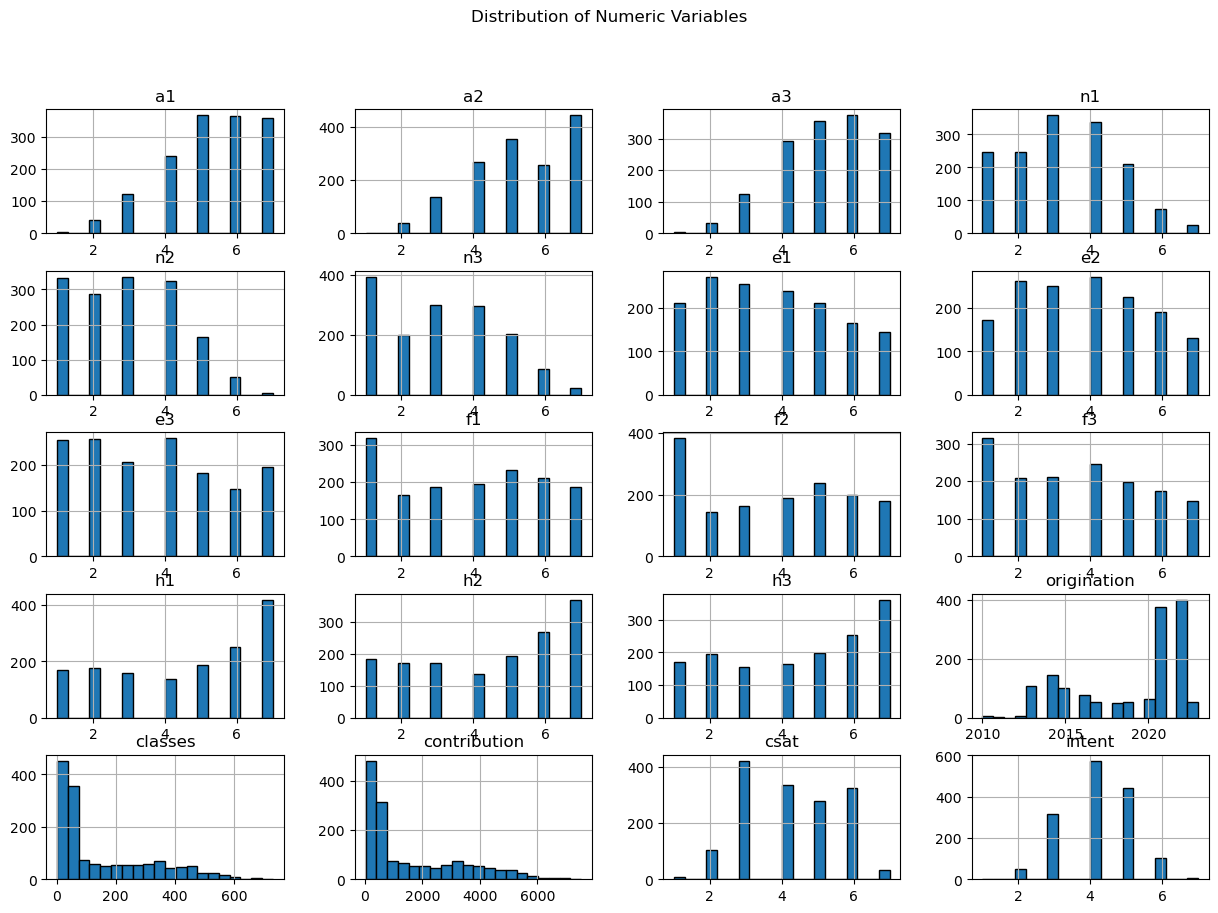

In [8]:
crews_cup.hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numeric Variables')
plt.show()

Numeric Columns 
1. Commitment variables 
- a1, a2, a3 (Affective Commitment)
- n1, n2, n3 (Normative Commitment)
- e1, e2, e3 (Economic Commitment)
- f1, f2, f3 (Forced Commitment)
- h1, h2, h3 (Habitual Commitment)
2. Other numeric variables
- csat (Customer Satisfaction) 
- intent (Intent to Continue)
- origination: Year of first class
- classes: Total number of classes taken
- profit: Revenue minus direct costs for the customer

Non-Numeric Columns 
1. id: Unique customer identifer 
2. concept: Test condition
3. treatment: Group assignment for the study 

Filtered Numeric Data:
   a1  a2  a3  n1  n2  n3  e1  e2  e3  f1  f2  f3  h1  h2  h3  origination  \
0   7   5   6   2   3   2   1   2   2   4   4   4   4   4   3         2021   
1   6   7   5   2   1   1   7   7   7   4   3   3   6   6   5         2016   
2   4   5   6   2   1   1   1   1   1   1   1   1   1   1   1         2021   
3   7   7   7   1   1   1   7   6   6   6   6   5   7   6   7         2014   
4   5   3   5   2   1   2   3   2   1   1   1   1   1   2   1         2022   

   classes  contribution  csat  intent  
0       42        388.78     4       4  
1      231       2403.93     5       6  
2       48        389.09     6       3  
3      513       4812.88     4       5  
4       16        152.25     6       3  


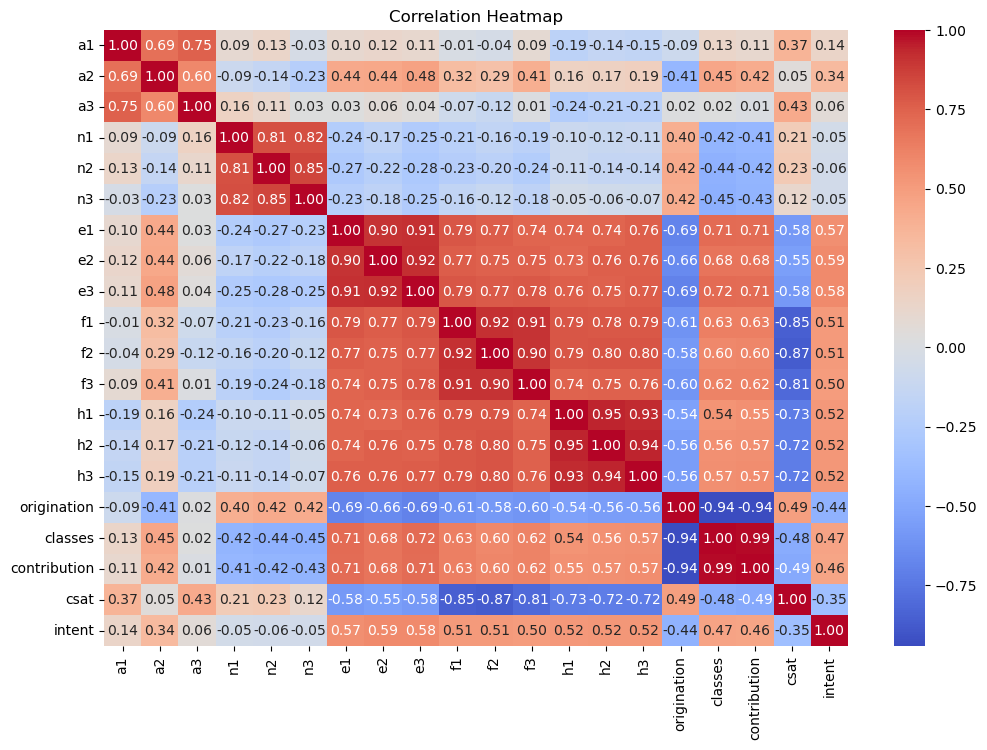

In [9]:
# Select only numeric columns for analysis
numeric_data = crews_cup.select_dtypes(include=['number'])

# Display the first few rows of the numeric dataset
print("Filtered Numeric Data:")
print(numeric_data.head())

# Proceed with statistical analysis or visualizations using numeric_data

# Plot correlation heatmap 
plt.figure(figsize=(12,8))
correlation = numeric_data.corr() 
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

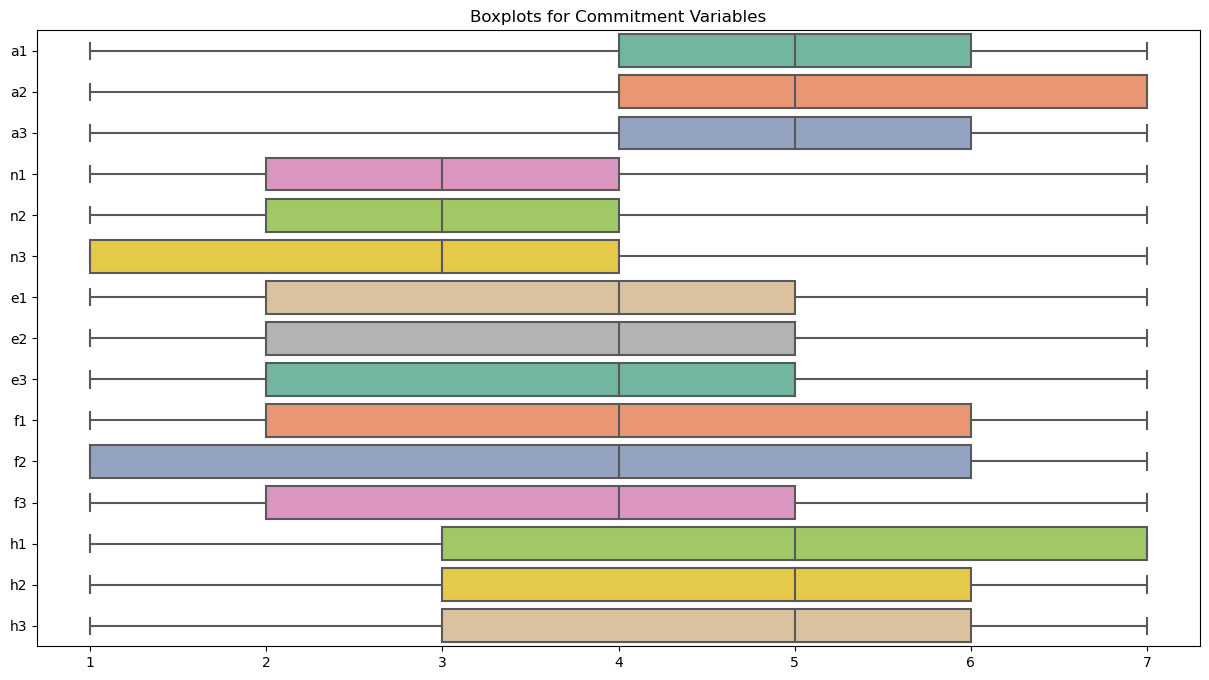

In [10]:
# Boxplot for detecting outliers
commitment_cols = ['a1', 'a2', 'a3', 'n1', 'n2', 'n3', 'e1', 'e2', 'e3', 'f1', 'f2', 'f3', 'h1', 'h2', 'h3']
plt.figure(figsize=(15, 8))
sns.boxplot(data=crews_cup[commitment_cols], orient='h', palette='Set2')
plt.title('Boxplots for Commitment Variables')
plt.show()

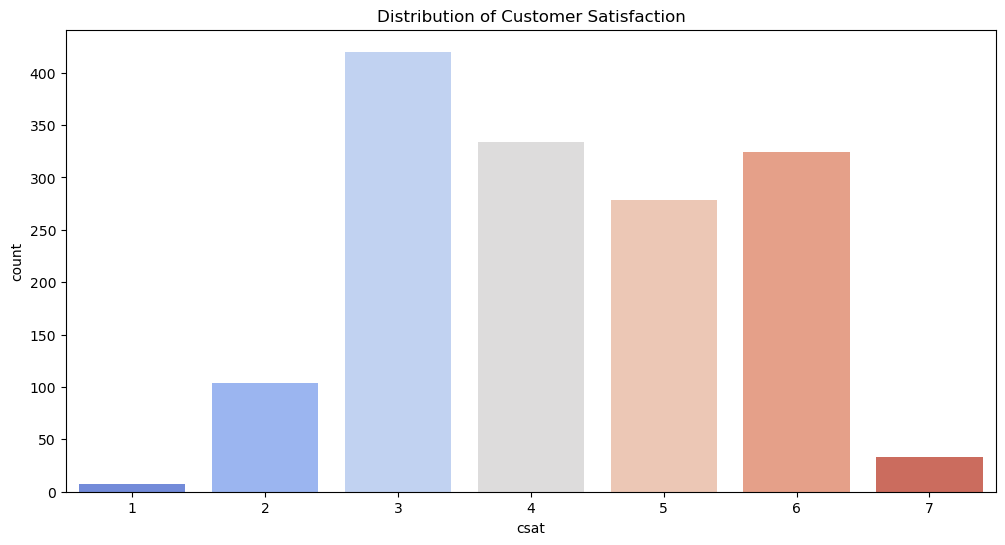

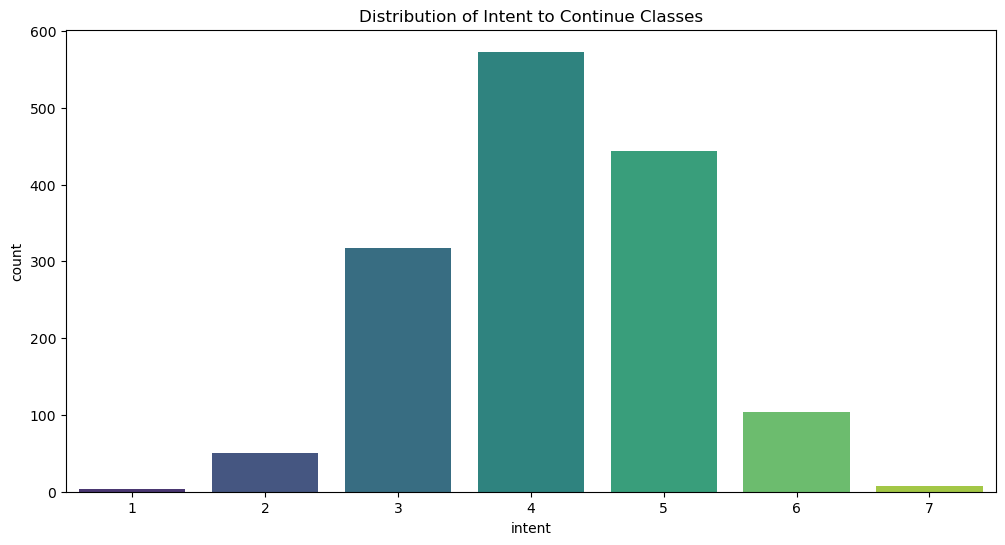

In [11]:
# Check the distribution of customer satisfaction and intent
plt.figure(figsize=(12, 6))
sns.countplot(data=crews_cup, x='csat', palette='coolwarm')
plt.title('Distribution of Customer Satisfaction')
plt.show()
# 1: extremely dissatisfied; 7: extremely satisfied

plt.figure(figsize=(12, 6))
sns.countplot(data=crews_cup, x='intent', palette='viridis')
plt.title('Distribution of Intent to Continue Classes')
plt.show()
# 1: Definitely Will Not; 7: Definitely Will

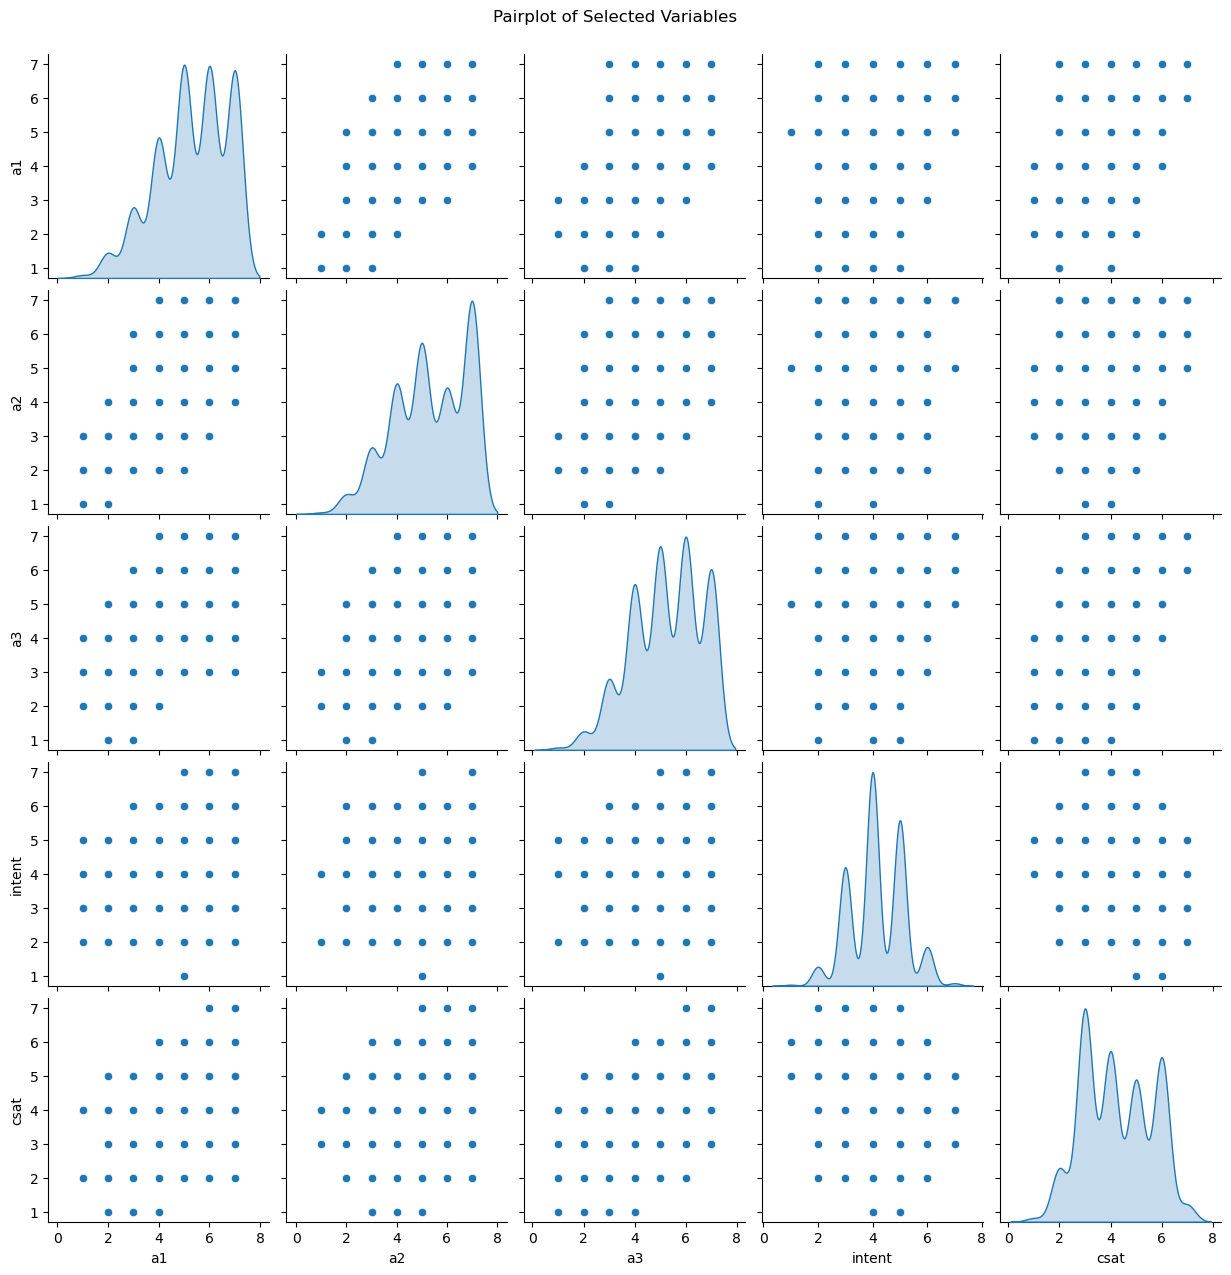

In [12]:
# Pairplot for a subset of variables
subset_cols = ['a1', 'a2', 'a3', 'intent', 'csat']
sns.pairplot(crews_cup[subset_cols], diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

In [13]:
# pip install factor-analyzer

In [14]:
numeric_data = crews_cup[commitment_cols]

In [15]:
from factor_analyzer import FactorAnalyzer

# Step 1: Check for Suitability (Kaiser-Meyer-Olkin (KMO) Test and Bartlett’s Test)
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO test
kmo_all, kmo_model = calculate_kmo(numeric_data)
print(f"KMO Test Value: {kmo_model:.2f}")

KMO Test Value: 0.89


The KMO value is above 0.8, so this indicates that the data is suitable for factor analysis. There is enough common variance among the variables for meaningful factor extraction.

In [16]:
# Bartlett’s test
chi_square_value, p_value = calculate_bartlett_sphericity(numeric_data)
print(f"Bartlett’s Test Chi-Square: {chi_square_value}, p-value: {p_value}")

Bartlett’s Test Chi-Square: 30226.096998027744, p-value: 0.0


This test is highly significant, confirming that the variables are sufficiently correlated to perform factor analysis.

In [17]:
# Step 2: Perform Exploratory Factor Analysis (EFA)

# Initialize factor analyzer
fa = FactorAnalyzer(rotation="varimax", method='principal')
fa.fit(numeric_data)


FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

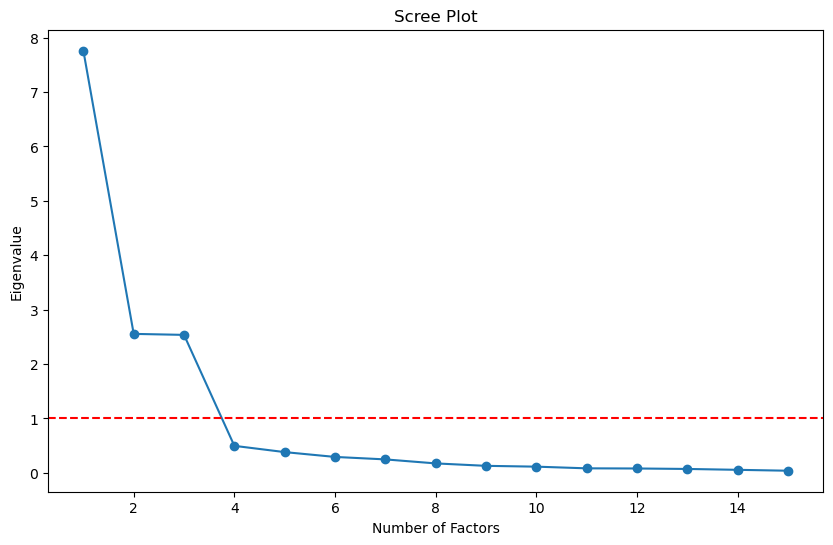

In [18]:
# Step 3: Determine Optimal Number of Factors (Eigenvalues)
eigenvalues, vectors = fa.get_eigenvalues()

# Plot Eigenvalues to Use the Elbow Criterion
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # Kaiser criterion
plt.show()


While the theoretical model suggests 5 factors, the scree plot supports simplifying the structure to 3 factors. Retaining 3 factors might explain a significant portion of the variance while reducing complexity. These factors could represent broader constructs that combine aspects of the original 5 factors. The red dashed line indicates the Kaiser criterion, retaining factors with eigenvalues > 1. 

In [19]:
# Step 4: Extract Factors
optimal_factors = 5  # Adjust based on the scree plot
fa = FactorAnalyzer(n_factors=optimal_factors, rotation="varimax", method='principal')
fa.fit(numeric_data)

# Step 5: Loadings for Each Factor
loadings = pd.DataFrame(fa.loadings_, index=commitment_cols)
loadings.columns = [f"Factor {i+1}" for i in range(optimal_factors)]
print("Factor Loadings:")
print(loadings)


Factor Loadings:
    Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
a1 -0.060293  0.055196  0.927234  0.011852 -0.004668
a2  0.279689 -0.152000  0.835202  0.055460  0.143698
a3 -0.131956  0.094887  0.890385 -0.010412  0.002733
n1 -0.088769  0.926357  0.066908 -0.024371 -0.018637
n2 -0.107282  0.932838  0.051135 -0.063053 -0.066016
n3 -0.051105  0.949147 -0.090460  0.022373 -0.024793
e1  0.799910 -0.173321  0.157333  0.054959  0.489660
e2  0.809738 -0.110124  0.186755  0.016451  0.489524
e3  0.818059 -0.189461  0.184654  0.047597  0.454093
f1  0.862531 -0.124056  0.045897  0.416554  0.088897
f2  0.874276 -0.079378  0.009342  0.410938  0.056988
f3  0.842762 -0.134350  0.155613  0.440593  0.016084
h1  0.965086 -0.010111 -0.127571 -0.103300 -0.030488
h2  0.969512 -0.031779 -0.096340 -0.119113 -0.036640
h3  0.965196 -0.029461 -0.096152 -0.107238  0.002535


Factor Loadings > |0.4| are considered significant and indicate a strong relationship between the variable and the factor. 

Factor 1:

- Strongly loads on e1, e2, e3, f1, f2, f3, and h1, h2, h3.
- Represents Economic and Habitual Commitment (cost-effectiveness and routine).
- Customers motivated by this factor value practical benefits and regularity.

Factor 2:

- Strongly loads on n1, n2, and n3.
- Represents Normative Commitment (loyalty and obligation).
- Customers motivated by this factor feel a sense of duty to remain engaged.

Factor 3:

- Strongly loads on a1, a2, and a3.
- Represents Affective Commitment (emotional attachment).
- These customers are emotionally connected and driven by their feelings about Crew's Cup.

Factor 4:

- Moderately loads on f1, f2, and f3.
- Represents Forced Commitment (external pressure or lack of alternatives).
- These customers may feel obligated due to external factors or limited options.

Factor 5:

- Moderately loads on e1, e2, and e3.
- Represents Miscellaneous Commitment (possibly a mix of economic and external influences).

How to Use These Insights
The factor loadings help identify the drivers behind customer engagement. These can guide targeted strategies for each segment (cluster) based on their dominant factors.

Strategic Implications by Cluster
1. Cluster 0: Loyal but Emotionally Disengaged
- Dominant Factors: Factor 2 (Normative Commitment).
- Strategy: Strengthen emotional engagement through personalized campaigns (Factor 3). Use community-building activities to reinforce their loyalty (Factor 2).

2. Cluster 1: Emotionally Attached but Price-Sensitive
- Dominant Factors: Factor 1 (Economic Commitment) and Factor 3 (Affective Commitment).
- Strategy: Focus on affordability with tiered subscription models (Factor 1). Use emotional campaigns and experiences to reinforce their connection (Factor 3).

3. Cluster 2: Disengaged and Unmotivated
- Dominant Factors: None (Low Factor 1 and 3 scores, moderate Factor 2).
- Strategy:Re-engage with targeted offers or promotions to reignite interest. Consider transitioning resources to more motivated clusters if re-engagement fails.


In [20]:
# Step 6: Save Factor Scores (if required)
factor_scores = fa.transform(numeric_data)
factor_scores_df = pd.DataFrame(factor_scores, columns=[f"Factor {i+1}" for i in range(optimal_factors)])
print("\nFactor Scores:")
print(factor_scores_df.head())

# Optional: Save results to a file
factor_scores_df.to_csv("factor_scores.csv", index=False)


Factor Scores:
   Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
0 -0.287380 -0.573471  0.759722  0.880413 -2.501374
1  0.410494 -1.138234  0.445741 -1.942525  2.581975
2 -1.783616 -1.373449 -0.178004  0.196835 -0.339818
3  1.065193 -1.324378  1.338358 -0.561981  0.149895
4 -1.687553 -1.043529 -0.723656  0.027602  0.740412


The factor scores represent how each respondent aligns with the extracted factors. 

#### Question 2: K-Means Clustering

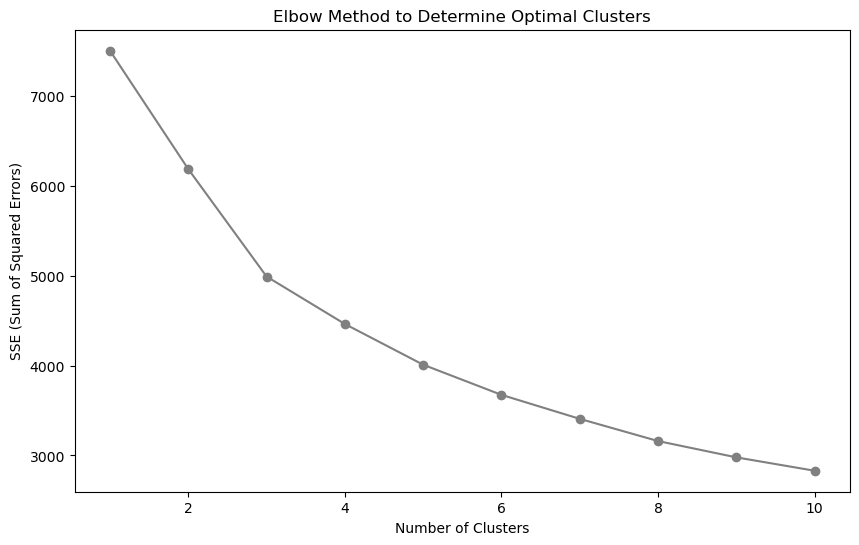

In [21]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Step 1: Determine Optimal Number of Clusters (Elbow Method)
sse = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters: 
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(factor_scores_df)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sse, marker='o', color='gray')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()



Observing the Plot:
- Sharp Drop: The Sum of Squared Errors (SSE) decreases steeply between 1 and 3 clusters. This indicates that adding more clusters significantly improves the grouping.
- Leveling Off: After 3 clusters, the reduction in SSE becomes more gradual, indicating diminishing returns with additional clusters.
- Possible Choices: 3 clusters: Simplifies the segmentation and aligns with the sharpest elbow. 4 clusters: May capture slightly more nuanced customer distinctions.


In [22]:
# Step 2: Fit K-Means Clustering with Optimal Number of Clusters
optimal_clusters = 3  # Based on elbow plot or theoretical understanding
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(factor_scores_df)

# Add cluster labels to the DataFrame
factor_scores_df['Cluster'] = cluster_labels


In [23]:
# Step 3: Analyze Clusters
# Calculate the mean factor score for each cluster
cluster_summary = factor_scores_df.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

# Optional: Silhouette Score to Validate Clustering
silhouette_avg = silhouette_score(factor_scores_df.iloc[:, :-1], cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Cluster Summary:
         Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
Cluster                                                  
0        0.553153  0.612420 -0.891651  0.061527 -0.066350
1        0.894211 -0.989001  0.670971  0.114062  0.467314
2       -1.060469  0.110943  0.337781 -0.127435 -0.245885
Silhouette Score: 0.26


#### Silhouette Score
- Silhouette Score: 0.26
- Indicates low clustering quality.
- Some overlap exists between clusters, suggesting that the segmentation is not very distinct.
This may be due to:
High correlation between factors.
Overlapping customer behaviors across dimensions.
To improve, consider:
Using fewer clusters (e.g., 2 clusters instead of 3).
Refining input variables (e.g., removing less meaningful factors).

#### ANOVA

In [24]:
import pandas as pd
import scipy.stats as stats

# List of factors
factors = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5']

# Initialize a results dictionary
anova_results = {}

# Perform ANOVA for each factor across clusters
for factor in factors:
    grouped_data = [factor_scores_df[factor][factor_scores_df['Cluster'] == cluster] 
                    for cluster in factor_scores_df['Cluster'].unique()]
    f_stat, p_value = stats.f_oneway(*grouped_data)
    anova_results[factor] = {'F-Statistic': f_stat, 'P-Value': p_value}

# Convert results to a DataFrame for better readability
anova_results_df = pd.DataFrame(anova_results).T
print(anova_results_df)


          F-Statistic        P-Value
Factor 1  2352.161623   0.000000e+00
Factor 2   471.581243  1.481106e-159
Factor 3   577.476620  1.301577e-186
Factor 4     8.412249   2.328006e-04
Factor 5    66.755211   1.695582e-28


From the ANOVA results:

Key Insights
Factor 1:

F-Statistic: 2352.16 (very high).
P-Value: 0.000000 (extremely significant).
Conclusion: Factor 1 has a highly significant difference across clusters, suggesting strong differentiation among segments based on this factor.
Factor 2:

F-Statistic: 471.58, P-Value: 1.48e-159.
Conclusion: Factor 2 also significantly differs across clusters, though the effect is weaker than Factor 1.
Factor 3:

F-Statistic: 577.48, P-Value: 1.30e-186.
Conclusion: Factor 3 shows significant differentiation among clusters, with a stronger effect than Factor 2 but weaker than Factor 1.
Factor 4:

F-Statistic: 8.41, P-Value: 2.33e-04.
Conclusion: Factor 4 is statistically significant, but its F-Statistic is much lower, suggesting it has less impact on distinguishing clusters compared to Factors 1–3.
Factor 5:

F-Statistic: 66.76, P-Value: 1.70e-28.
Conclusion: Factor 5 has a significant effect on cluster differentiation, but its impact is weaker than Factors 1–3.
Interpretation
Strongest Differentiation:

Factors 1, 2, and 3 are the most impactful in distinguishing clusters.
These factors likely represent the core elements of commitment driving segmentation.
Weakest Differentiation:

Factors 4 and 5 are less effective in distinguishing clusters, but they are still statistically significant.
Consider their relevance in the theoretical framework to determine whether to retain them for further analysis.
Next Steps
Incorporate in the Report:

Highlight the significance of each factor in distinguishing clusters.
Focus on Factors 1–3 as the primary drivers of differentiation.
Visualize the Results:

Use bar plots or box plots to visualize the mean scores of these factors across clusters.
Use for Strategy Development:

Tailor strategies around the factors most relevant to commitment and intent (likely Factors 1–3).
Would you like to see a visualization of these results or dive deeper into cluster-level differences?

#### Regression

Regression and clustering are separate analyses and should be conducted independently. They address different research questions. Clustering is to group data into segments based on similarity in factor scores (or other features). Regression is to model the relationship between intent (dependent variable) and a set of independent variables (e.g., commitment factors, treatment, profit, customer satisfaction). 

In [25]:
import statsmodels.api as sm

# Add all five factors
X = factor_scores_df[['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5']]
y = crews_cup['intent']  # Dependent variable

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 intent   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          1.34e-154
Time:                        10:56:37   Log-Likelihood:                -1729.8
No. Observations:                1500   AIC:                             3472.
Df Residuals:                    1494   BIC:                             3503.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1627      0.020    209.872      0.0

In [26]:
import statsmodels.api as sm

# Add all five factors
X = factor_scores_df[['Factor 1', 'Factor 3', 'Factor 5']]
y = crews_cup['intent']  # Dependent variable

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model2 = sm.OLS(y, X).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                 intent   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     311.5
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          4.41e-157
Time:                        10:56:37   Log-Likelihood:                -1729.8
No. Observations:                1500   AIC:                             3468.
Df Residuals:                    1496   BIC:                             3489.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1627      0.020    210.009      0.0

In [27]:
# Checking for index alignment 
factor_scores_df.shape

(1500, 6)

In [28]:
# Checking for index alignment 
print(factor_scores_df.index.equals(crews_cup.index))


True


In [29]:
# Merge necessary variables into factor_scores_df
factor_scores_df = factor_scores_df.merge(
    crews_cup[['treatment', 'contribution', 'csat', 'intent']],
    left_index=True,  # or use on='id' if id exists in both
    right_index=True,
    how='left'
)

# One-hot encode the treatment variable
factor_scores_df = pd.get_dummies(factor_scores_df, columns=['treatment'], drop_first=True)


In [30]:
factor_scores_df.head()

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Cluster,contribution,csat,intent,treatment_Control,treatment_New Product,treatment_Subscription
0,-0.287380,-0.573471,0.759722,0.880413,-2.501374,2,388.78,4,4,False,False,True
1,0.410494,-1.138234,0.445741,-1.942525,2.581975,1,2403.93,5,6,False,True,False
2,-1.783616,-1.373449,-0.178004,0.196835,-0.339818,2,389.09,6,3,False,False,True
3,1.065193,-1.324378,1.338358,-0.561981,0.149895,1,4812.88,4,5,False,False,False
4,-1.687553,-1.043529,-0.723656,0.027602,0.740412,2,152.25,6,3,False,False,True


In [31]:
# Define independent variables
independent_vars = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 
                    'contribution', 'csat', 'treatment_Control', 'treatment_New Product', 'treatment_Subscription']

# Prepare X and y for regression
X = factor_scores_df[independent_vars]
y = factor_scores_df['intent']


In [32]:
X.dtypes

Factor 1                  float64
Factor 2                  float64
Factor 3                  float64
Factor 4                  float64
Factor 5                  float64
contribution              float64
csat                        int64
treatment_Control            bool
treatment_New Product        bool
treatment_Subscription       bool
dtype: object

In [33]:
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)


In [34]:
X.dtypes

Factor 1                  float64
Factor 2                  float64
Factor 3                  float64
Factor 4                  float64
Factor 5                  float64
contribution              float64
csat                        int64
treatment_Control           int64
treatment_New Product       int64
treatment_Subscription      int64
dtype: object

In [35]:
# Add constant for regression
X = sm.add_constant(X)

# Fit the regression model
model3 = sm.OLS(y, X).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                 intent   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     102.0
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          7.84e-161
Time:                        10:56:37   Log-Likelihood:                -1702.6
No. Observations:                1500   AIC:                             3427.
Df Residuals:                    1489   BIC:                             3486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

In [37]:
# Define independent variables
independent_vars = ['Factor 1', 'Factor 3', 'Factor 5', 
                    'contribution', 'csat', 'treatment_Control', 'treatment_New Product', 'treatment_Subscription']

# Prepare X and y for regression
X = factor_scores_df[independent_vars]
y = factor_scores_df['intent']

bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

# Add constant for regression
X = sm.add_constant(X)

# Fit the regression model
model4 = sm.OLS(y, X).fit()
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                 intent   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     127.0
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          2.76e-162
Time:                        11:00:46   Log-Likelihood:                -1704.1
No. Observations:                1500   AIC:                             3426.
Df Residuals:                    1491   BIC:                             3474.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

In [38]:
# Define independent variables
independent_vars = ['Factor 1', 'Factor 3', 'Factor 5', 
                    'contribution', 'treatment_Control', 'treatment_New Product', 'treatment_Subscription']

# Prepare X and y for regression
X = factor_scores_df[independent_vars]
y = factor_scores_df['intent']

bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

# Add constant for regression
X = sm.add_constant(X)

# Fit the regression model
model5 = sm.OLS(y, X).fit()
print(model5.summary())


                            OLS Regression Results                            
Dep. Variable:                 intent   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     144.9
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          4.23e-163
Time:                        11:02:57   Log-Likelihood:                -1704.7
No. Observations:                1500   AIC:                             3425.
Df Residuals:                    1492   BIC:                             3468.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4